In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

## Load Data

In [3]:
(x_train, y_train),  (x_test, y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


## Preprocess Data

As you can see the datatype of our dataset is integer, So we will convert that to float

In [4]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [6]:
# normalize 
mean = np.mean(x_train)
std = np.std(x_train)
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

We also need to convert our label dataset to categorical structure, It is similar to the one hot encoding 

In [7]:
x_test.shape

(10000, 32, 32, 3)

In [8]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes = 10)

In [9]:
x_test.shape , y_test.shape

((10000, 32, 32, 3), (10000, 10))

## First, Simple Model

* Let's understand our code line by line  
     1) We have created sequential model
     2) We are adding 32 convolution filter of size (3,3) having same input and output shape.  
     3) Then we are adding maxpooling layer which will reduce the x and y dimention by 2.    
     4) We will add dropout layer, Which will ensure that multiple neuron will learn how to identify part of image.  
     5) We are flattening our image to one dimentional array by using flatten.  .  
     6) We are using dense layer with 512 neuron, With activation function selu. Which is maximum of alpha(exp(z) -1 ) or z.    
     7) We will again use dropout to drop 50% of neuron.  
     8) Now we will use softmax to get probablities of each class.  
    

In [10]:
model = keras.models.Sequential()

model.add(keras.layers.Convolution2D(32, (3,3), input_shape = x_train.shape[1:], activation ='selu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(keras.layers.Dropout(0.20))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation = 'selu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation ='softmax'))

In [11]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = tf.keras.optimizers.RMSprop(),
             metrics = ['accuracy'])

In [12]:
history = model.fit(x_train, y_train, epochs = 20, 
         validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 13s 4ms/step - loss: 2.2966 - accuracy: 0.3768 - val_loss: 1.4026 - val_accuracy: 0.5058
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3837 - accuracy: 0.5182 - val_loss: 1.2927 - val_accuracy: 0.5493
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2809 - accuracy: 0.5554 - val_loss: 1.2343 - val_accuracy: 0.5686
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1942 - accuracy: 0.5892 - val_loss: 1.1970 - val_accuracy: 0.5887
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1249 - accuracy: 0.6107 - val_loss: 1.1551 - val_accuracy: 0.6045
Epoch 6/20
1250/1250 [==============================] - 4s 4ms/step - loss: 1.0507 - accuracy: 0.6442 - val_loss: 1.1050 - val_accuracy: 0.6267
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9902 - accuracy: 0.6635 - val_loss: 1.1940 - val_accuracy

As we can seee from the figure,  
about Training,  Training accuracy increasing with descresed in training loss  
about Validation, Validation increasing but loss is fluctuacting for a while and the increased

<AxesSubplot:>

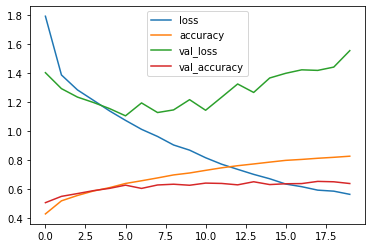

In [13]:
pd.DataFrame(history.history).plot()

But though our data is getting good accuracy on training it is not perorming well with test data, We got only 67% accuracy

In [14]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5661 - accuracy: 0.6361


## Second Model accuracy 82%

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Convolution2D(32, (3,3), activation = 'relu', input_shape = x_train.shape[1:], padding = 'same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Convolution2D(32, (3,3), activation = 'relu', input_shape = x_train.shape[1:], padding = 'same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Convolution2D(64, (3,3), activation = 'relu', input_shape = x_train.shape[1:], padding = 'same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Convolution2D(64, (3,3), activation = 'relu', input_shape = x_train.shape[1:], padding = 'same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(keras.layers.Dropout(0.25))


model.add(keras.layers.Convolution2D(128, (3,3), activation = 'relu', input_shape = x_train.shape[1:], padding = 'same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Convolution2D(128, (3,3), activation = 'relu', input_shape = x_train.shape[1:], padding = 'same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)       

In [16]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = tf.keras.optimizers.RMSprop(),
             metrics = ['accuracy'])

In [17]:
history = model.fit(x_train, y_train, epochs = 20, validation_split = 0.2)

Epoch 1/20
1250/1250 [==============================] - 10s 7ms/step - loss: 2.1818 - accuracy: 0.3844 - val_loss: 1.2660 - val_accuracy: 0.6091
Epoch 2/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.0758 - accuracy: 0.6412 - val_loss: 0.8462 - val_accuracy: 0.7131
Epoch 3/20
1250/1250 [==============================] - 8s 6ms/step - loss: 0.8522 - accuracy: 0.7094 - val_loss: 0.7226 - val_accuracy: 0.7478
Epoch 4/20
1250/1250 [==============================] - 9s 7ms/step - loss: 0.7061 - accuracy: 0.7554 - val_loss: 0.6509 - val_accuracy: 0.7799
Epoch 5/20
1250/1250 [==============================] - 8s 6ms/step - loss: 0.6167 - accuracy: 0.7873 - val_loss: 0.5964 - val_accuracy: 0.7950
Epoch 6/20
1250/1250 [==============================] - 8s 6ms/step - loss: 0.5501 - accuracy: 0.8104 - val_loss: 0.6050 - val_accuracy: 0.8022
Epoch 7/20
1250/1250 [==============================] - 8s 6ms/step - loss: 0.4914 - accuracy: 0.8290 - val_loss: 0.5627 - val_accuracy

<AxesSubplot:>

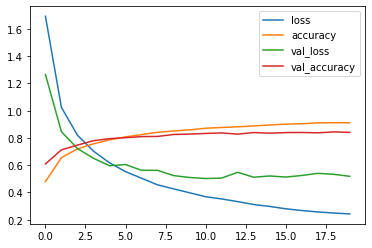

In [18]:
pd.DataFrame(history.history).plot()

In [19]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5327 - accuracy: 0.8382


[0.5327353477478027, 0.8381999731063843]

## Third Model

### With ImageDataGenerator Accuracy 84%

We will try to get more training data using IMAGEDATAFENERATOR

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
 rotation_range=30,
 width_shift_range=0.2,
 height_shift_range=0.2,
 horizontal_flip=True,
 )
datagen.fit(x_train)

In [21]:
batch_size = 64
history = model.fit(datagen.flow(x_train, y_train, 
 batch_size=batch_size),
 epochs=40,
 verbose=1,validation_data=(x_test,y_test))

Epoch 1/40
782/782 [==============================] - 29s 37ms/step - loss: 0.9804 - accuracy: 0.6785 - val_loss: 0.6341 - val_accuracy: 0.7901
Epoch 2/40
782/782 [==============================] - 30s 39ms/step - loss: 0.8306 - accuracy: 0.7132 - val_loss: 0.6243 - val_accuracy: 0.7962
Epoch 3/40
782/782 [==============================] - 30s 38ms/step - loss: 0.7848 - accuracy: 0.7279 - val_loss: 0.6323 - val_accuracy: 0.7916
Epoch 4/40
782/782 [==============================] - 30s 38ms/step - loss: 0.7549 - accuracy: 0.7405 - val_loss: 0.6117 - val_accuracy: 0.8042
Epoch 5/40
782/782 [==============================] - 30s 38ms/step - loss: 0.7363 - accuracy: 0.7448 - val_loss: 0.5690 - val_accuracy: 0.8107
Epoch 6/40
782/782 [==============================] - 30s 38ms/step - loss: 0.7131 - accuracy: 0.7549 - val_loss: 0.5421 - val_accuracy: 0.8153
Epoch 7/40
782/782 [==============================] - 31s 39ms/step - loss: 0.7039 - accuracy: 0.7578 - val_loss: 0.5935 - val_accuracy:

In [22]:
model_json = model.to_json()

with open(r'/kaggle/working/model.json', 'w') as json_file :
    json_file.write(model_json)

model.save_weights(r'/kaggle/working/model.h5')

<AxesSubplot:>

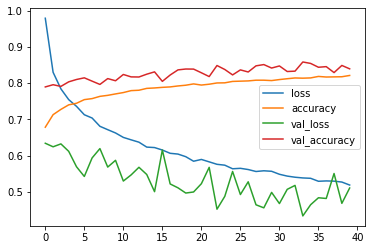

In [23]:
pd.DataFrame(history.history).plot()

In [24]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5101 - accuracy: 0.8402


[0.5100969672203064, 0.8402000069618225]